In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv("Emotion_classify_Data.csv")
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [3]:
df['Emotion'].value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.Comment, df.Emotion, test_size=0.2, random_state=42)

X_train[2]


'i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it'

In [5]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_test_count = v.transform(X_test.values)

In [6]:
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2, 7900))

In [7]:
len(X_train_count.toarray()[1])

7900

In [8]:
model = MultinomialNB()
model.fit(X_train_count, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [9]:
y_pred = model.predict(X_test_count)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       anger       0.88      0.92      0.90       392
        fear       0.89      0.92      0.90       416
         joy       0.92      0.85      0.88       380

    accuracy                           0.89      1188
   macro avg       0.90      0.89      0.89      1188
weighted avg       0.90      0.89      0.89      1188



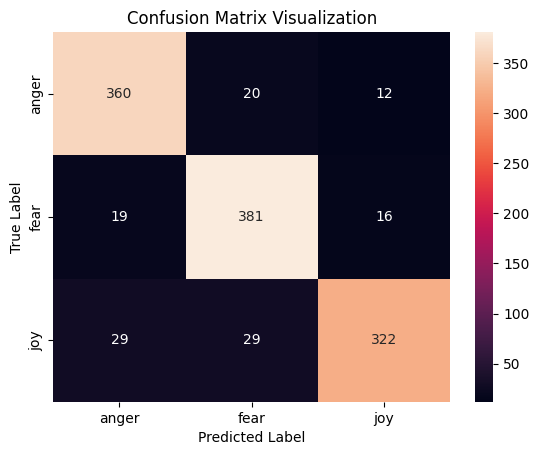

In [10]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.show()

In [11]:
texts = [
    "I am extremely happy today",
    "This is the worst experience ever",
    "I feel scared and nervous",
    "I love my family and friends"
]

texts_count = v.transform(texts)
model.predict(texts_count)

array(['joy', 'joy', 'fear', 'joy'], dtype='<U5')

In [12]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

       anger       0.88      0.92      0.90       392
        fear       0.89      0.92      0.90       416
         joy       0.92      0.85      0.88       380

    accuracy                           0.89      1188
   macro avg       0.90      0.89      0.89      1188
weighted avg       0.90      0.89      0.89      1188



In [13]:
pipe.predict(texts)

array(['joy', 'joy', 'fear', 'joy'], dtype='<U5')

In [14]:
import pickle

with open("emotion_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("emotion_vectorizer.pkl", "wb") as f:
    pickle.dump(v, f)

print("✅ Model and Vectorizer saved successfully")

✅ Model and Vectorizer saved successfully
